1. __데이터__

- wine_review.csv 파일 분석

2. __데이터 전처리__

- 데이터 정리

In [16]:
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# NLTK 불용어 리스트 다운로드
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# CSV 파일 로드
df = pd.read_csv('./wine_review.csv')

# 데이터 확인
print(df.head())
print(df.info())

# 필요한 열만 남기고 나머지 열 삭제
df = df[['reviews.text']]

# 특정 열에서 결측값이 있는 행 제거
df = df.dropna(subset=['reviews.text']).drop_duplicates()

                     id asins            brand  \
0  AV13ClKCGV-KLJ3akN68   NaN            Gallo   
1  AV13CsvW-jtxr-f38AQO   NaN  Fresh Craft Co.   
2  AV13CVI_glJLPUi8O7Po   NaN     1000 Stories   
3  AV13CVI_glJLPUi8O7Po   NaN     1000 Stories   
4  AV13CYL4-jtxr-f37_-t   NaN     Wine Cube153   

                                          categories             dateAdded  \
0  Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:59:11Z   
1  Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:59:42Z   
2  Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:58:05Z   
3  Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:58:05Z   
4  Food & Beverage,Beverages,Wine, Beer & Liquor,...  2017-07-24T23:58:18Z   

            dateUpdated                                       descriptions  \
0  2018-01-10T18:06:28Z                                                NaN   
1  2018-01-10T05:38:33Z  [{"dateSeen":["2017-12-21T05:43:00.000Z","2017...

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- 텍스트 토큰화 및 불용어 제거

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize

# 텍스트 전처리 함수
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 및 구두점 제거
    text = text.lower()  # 소문자로 변환
    tokens = word_tokenize(text) # 토큰화
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# 토큰화 및 불용어 제거 적용
df['tokenized_text'] = df['reviews.text'].apply(clean_text)

- 텍스트 정규화 (표제어 추출)

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize

# 표제어 추출
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['processed_text'] = df['tokenized_text'].apply(lambda tokens: ' '.join([lemmatizer.lemmatize(token) for token in tokens]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3. __모델 구현__

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 리소스 다운로드
nltk.download('vader_lexicon')

# VADER 감성 분석기 초기화
vader_sentiment = SentimentIntensityAnalyzer()

# 감성 점수 계산 함수
def get_vader_sentiment(text):
    sentiment = vader_sentiment.polarity_scores(text)
    return sentiment['compound']


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


4. __모델 학습 및 튜닝__

In [22]:
# 리뷰 텍스트에 대해 감성 점수 계산
df['sentiment_score'] = df['processed_text'].apply(get_vader_sentiment)

# 감성 점수를 이진 레이블로 변환 (긍정적/부정적)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 1 if x >= 0 else 0)

# 데이터셋을 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(df['reviews.text'], df['sentiment'], test_size=0.2, random_state=42)

5. __모델 평가__

In [25]:
# 학습 세트에 대한 예측
y_train_pred = X_train.apply(get_vader_sentiment).apply(lambda x: 1 if x >= 0 else 0)
y_test_pred = X_test.apply(get_vader_sentiment).apply(lambda x: 1 if x >= 0 else 0)

# 정확도 및 분류 보고서
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

print('Classification Report (Test Data):')
print(classification_report(y_test, y_test_pred))

print('Confusion Matrix (Test Data):')
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

Train Accuracy: 0.9524509803921568
Test Accuracy: 0.9431372549019608
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        43
           1       0.97      0.96      0.97       467

    accuracy                           0.94       510
   macro avg       0.81      0.84      0.83       510
weighted avg       0.95      0.94      0.94       510

Confusion Matrix (Test Data):
[[ 31  12]
 [ 17 450]]


6. __시각화__

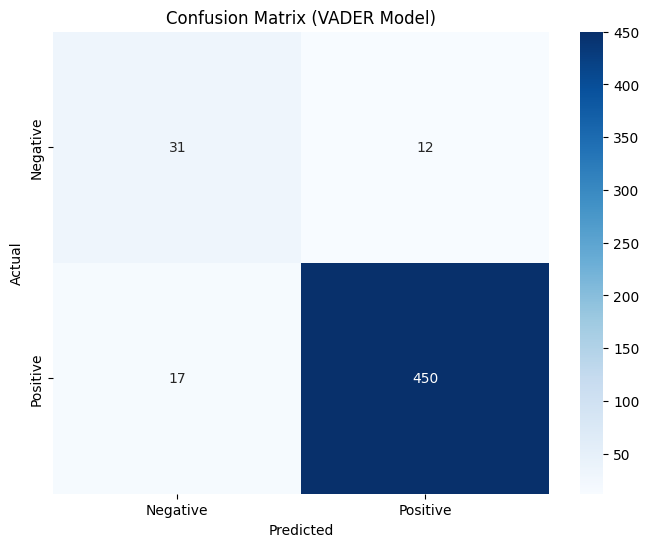

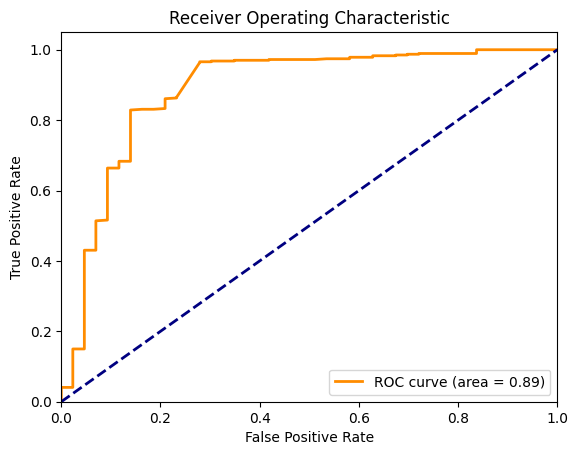

In [26]:
# 혼동 행렬 시각화 함수
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 혼동 행렬 시각화
plot_confusion_matrix(conf_matrix, 'Confusion Matrix (VADER Model)')

# ROC 곡선 및 AUC
y_test_proba = [vader_sentiment.polarity_scores(text)['compound'] for text in X_test]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
